Perform a service request data analysis of New York City 311 calls. 
Focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types. 

Import a 311 NYC service request

Basic data exploratory analysis.
* Explore data.
* Find patterns.
* Display the complaint type and city together.
* Find major complaint types.
* Find the top 10 complaint types.
* Plot a bar graph of count vs. complaint types.
* Visualize the complaint type.
* Display the major complaint types and their count.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

c:\program files (x86)\python35-32\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  return f(*args, **kwds)
c:\program files (x86)\python35-32\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  return f(*args, **kwds)


In [2]:
dataset = pd.read_csv("Requests.csv")

In [3]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
Unique_Agencies = set(dataset['Agency'])

In [5]:
Unique_Agencies

{'NYPD'}

In [6]:
Unique_NamesAgencies = set(dataset['Agency Name'])
Unique_NamesAgencies

{'Internal Affairs Bureau', 'NYPD', 'New York City Police Department'}

Only agency is NYPD.
 
The different agency names are 'Internal Affairs Bureau', 'NYPD', and 'New York City Police Department'

In [7]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
dates = dataset[['Created Date', 'Closed Date']]

In [9]:
names = dataset['Agency Name']

In [10]:
descriptor = dataset['Descriptor']

In [11]:
complaint_type = dataset['Complaint Type']

In [12]:
locations = dataset['Location Type']

In [13]:
city = dataset['City']

In [14]:
borough = dataset['Borough']

## Top complaint types

In [15]:
diff_complains = dataset.groupby('Complaint Type')
unique_complaints = complaint_type.value_counts()
print(unique_complaints)

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64


## Top descriptors

In [16]:
diff_descriptors= dataset.groupby('Descriptor')
unique_descriptors = descriptor.value_counts()
print(unique_descriptors)

No Access                         75888
Loud Music/Party                  69708
Posted Parking Sign Violation     27200
Partial Access                    24993
Loud Talking                      23810
With License Plate                21661
Blocked Hydrant                   19989
Commercial Overnight Parking      14997
Blocked Sidewalk                  13860
Car/Truck Music                   11940
Double Parked Blocking Traffic     7164
Engine Idling                      5323
Double Parked Blocking Vehicle     5167
Neglected                          5131
Banging/Pounding                   4959
Car/Truck Horn                     4478
Congestion/Gridlock                3237
Other (complaint details)          2489
In Prohibited Area                 2206
Overnight Commercial Storage       2102
Unlicensed                         1986
Unauthorized Bus Layover           1618
Truck Route Violation              1125
Tortured                           1041
In Public                           971


## Top 10 descriptors

In [17]:
print(unique_descriptors[:10])

No Access                        75888
Loud Music/Party                 69708
Posted Parking Sign Violation    27200
Partial Access                   24993
Loud Talking                     23810
With License Plate               21661
Blocked Hydrant                  19989
Commercial Overnight Parking     14997
Blocked Sidewalk                 13860
Car/Truck Music                  11940
Name: Descriptor, dtype: int64


## Top 10 complaint types

In [18]:
unique_complaints[:10]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

## Display the complaints for each city

In [19]:
 dataset.groupby(['Complaint Type','City']).size().reset_index()

,Complaint Type,City,0
0,Animal Abuse,ARVERNE,46
1,Animal Abuse,ASTORIA,170
2,Animal Abuse,BAYSIDE,53
3,Animal Abuse,BELLEROSE,15
4,Animal Abuse,BREEZY POINT,2
5,Animal Abuse,BRONX,1971
6,Animal Abuse,BROOKLYN,3191
7,Animal Abuse,CAMBRIA HEIGHTS,15
8,Animal Abuse,COLLEGE POINT,35
9,Animal Abuse,CORONA,104


## Display max complaint per city

In [20]:
 dataset.groupby(['Complaint Type','City']).size().reset_index().groupby('City').max()

,Complaint Type,0
City,,
ARVERNE,Vending,62
ASTORIA,Vending,3436
Astoria,Noise - Street/Sidewalk,311
BAYSIDE,Vending,638
BELLEROSE,Urinating in Public,138
BREEZY POINT,Noise - Vehicle,16
BRONX,Vending,17063
BROOKLYN,Vending,36447
CAMBRIA HEIGHTS,Traffic,177


## Plot a bar graph of count vs. complaint types for top 10

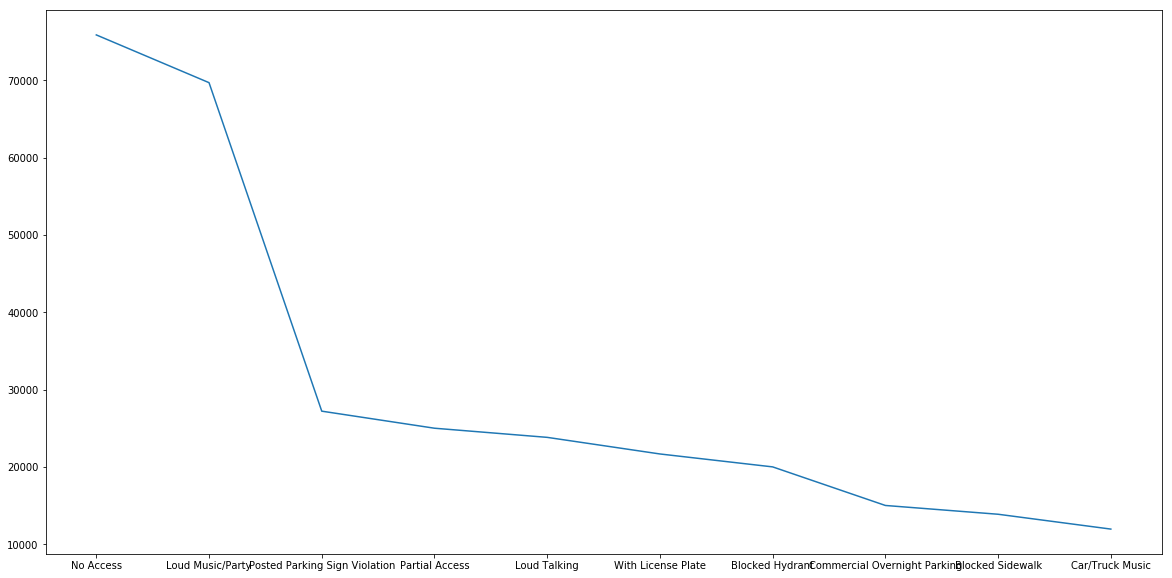

In [21]:
diff_descriptors= dataset.groupby('Descriptor')
unique_descriptors = descriptor.value_counts()[:10]
plt.figure(figsize=(20,10))
plt.plot(unique_descriptors)